## PS 3 - Fall 2020 - Week 11: Confidence Intervals

Let's continue using our example from last week to check that the Central Limit Theorem "works" and that our confidence interval procedure does in fact capture the truth 95% of the time.

Loading up the same libraries and data:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
# Loading in the data
mid = pd.read_csv('cleaned_midterms.csv')

In [2]:
mid

,District,Dem2018,Rep2018,state,party,voteshare,TRUMP.SCORE,Inc_fname,Inc_lname,inc_year_elected,...,Black,Latino,Asian,Native,Other,BA,BA_WHite,Med_Income,Inc_F,Rep.forecast
0,AK-1,45.8,53.7,AK,R,51.39,93.5,Don,Young,1973 Special,...,3.1,5.4,5.0,13.0,5.6,29.6,36.7,76440,0,51.39
1,AL-1,36.7,63.2,AL,R,65.84,96.8,Bradley,Byrne,2016,...,26.5,1.8,0.9,1.0,1.1,24.0,27.7,47083,0,65.84
2,AL-2,38.4,61.4,AL,R,57.86,96.7,Martha,Roby,2010,...,29.9,1.8,0.7,0.4,1.1,21.8,24.2,42035,1,57.86
3,AL-3,36.0,63.9,AL,R,62.03,96.8,Mike,Rogers,2002,...,25.1,1.7,0.7,0.3,0.9,22.8,23.7,46544,0,62.03
4,AL-4,20.1,79.8,AL,R,76.97,97.8,Robert,Aderholt,1996,...,6.9,1.8,0.5,0.7,1.3,17.0,17.8,41110,0,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,WI-7,38.5,60.2,WI,R,58.94,94.4,Sean,Duffy,2010,...,0.5,1.2,1.0,1.8,0.9,23.1,23.4,51738,0,58.94
319,WI-8,36.3,63.7,WI,R,60.91,94.6,Mike,Gallagher,2016,...,1.0,2.2,1.4,2.1,1.0,25.4,26.0,57888,0,60.91
320,WV-1,35.4,64.6,WV,R,62.64,97.8,David,McKinley,2010,...,2.4,0.9,0.6,0.2,0.9,23.5,23.1,45611,0,62.64
321,WV-2,43.0,54.0,WV,R,53.69,84.9,Alex,Mooney,2014,...,3.8,1.3,0.6,0.2,1.6,21.5,21.1,48358,0,53.69


## Checking the Central Limit Theorem

First lets check the precise predictions of the central limit theorem: that the standard deviation of the sampling distribution (or the standard error) will be approximately $\sigma/\sqrt{n}$.

For reasons discussed in the optional section below, we will use some slightly different code to take our random samples. In short, the difference is that we will now take samples *with replacement*, meaning that the same congressional district can get chosen more than once. Again, why this matters is explained below.

Population mean: 11.792879256965945
Average sample mean: 11.7859029
Population SD: 13.15745955208216


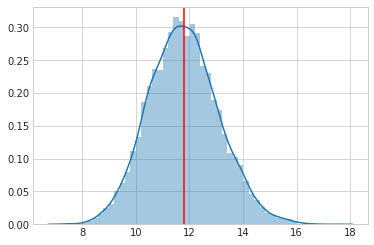

In [3]:
import random
n = 100
varname='Black'
# Taking the mean of 10,000 samples and storing it as sample_dist
sample_dist = [np.mean(random.choices(mid[varname], k=n)) for _ in range(10000)]
print("Population mean:", np.mean(mid[varname]))
print("Average sample mean:", np.mean(sample_dist))
print("Population SD:", np.std(mid[varname]))
sns.distplot(sample_dist)
plt.axvline(np.mean(mid[varname]), ymax=1, color='r')

As discussed last week, the average sample mean is almost exactly at the population mean. 

The standard deviation of the percentage Black variable in the population is around 13.16, and the square root of the sample size (100) is 10. So, the Central Limit Theorem predicts that if we take samples of 100, the standard deviation of the sampling distribution will be approximately 1.316.

And, voila, the standard devaition of the sampling distribution is very close to this.

In [4]:
print("Theoretical SE:", np.std(mid[varname])/np.sqrt(n))
print("SD of sampling distribution:", np.std(sample_dist))

Theoretical SE: 1.315745955208216
SD of sampling distribution: 1.317113846375916


Try changing the sample size or the variable in question to check that this is true more generally. 

## Checking confidence intervals

Recall that a 95% confidence interval is a procedure which produces a range which should capture our true population parameter 95% of the time. Let's check that this works.

First, just to get some practice doing confidence interval calculations, let's see what we get with a sample of 100 from our percentage Black variable.


In [8]:
sample = random.choices(mid['Black'], k=100)
lower = np.mean(sample) - 1.96*np.std(sample)/np.sqrt(n)
upper = np.mean(sample) + 1.96*np.std(sample)/np.sqrt(n)
print("95% confidence interval: [", lower, ", ", upper, "]")
print("Population mean:", np.mean(mid['Black']))

95% confidence interval: [ 11.81798394291837 ,  17.970016057081626 ]
Population mean: 11.792879256965945


Did the confidence interval capture the true population mean?

Now let's see what happens if we take repeated samples and make confidence intervals. 

Don't worry about the details of the code here: what we are doing is defining a function which takes a random sample, computes a confidence interval, and check whether it contains the parameter value

In [9]:
# Function to take a sample of n from varname, compute 95% confidence interval, and return whether it captures the truth
def in_interval(n=100, varname='Black'):
    sample = random.choices(mid[varname], k=n)
    lower = np.mean(sample) - 1.96*np.std(sample)/np.sqrt(n)
    upper = np.mean(sample) + 1.96*np.std(sample)/np.sqrt(n)
    return 1*(np.mean(mid[varname]) > lower)*(np.mean(mid[varname]) < upper)


Try running this a few times, you should see that it usually returns a 1, meaning the confidence interval does contain the true population parameter. But occaisionally you will get a 0, which means a miss!

In [17]:
in_interval()

1

Now what happens if we repeat this process 10,000 times. How often does our 95% confidence interval capture the truth?

In [18]:
in95 = [in_interval(n=100, varname="Black") for _ in range(10000)]
np.mean(in95)

0.9349

Very close to 95% of the time!

Now let's do the same thing for a 90% confidence interval, which requires checking up to 1.64 standard devations from the mean.

In [19]:
def in_interval90(n=100, varname='Black'):
    sample = random.choices(mid[varname], k=n)
    lower = np.mean(sample) - 1.64*np.std(sample)/np.sqrt(n)
    upper = np.mean(sample) + 1.64*np.std(sample)/np.sqrt(n)
    return 1*(np.mean(mid[varname]) > lower)*(np.mean(mid[varname]) < upper)
in90 = [in_interval90(n=100, varname="Black") for _ in range(10000)]
np.mean(in90)

0.887

Again, try changing the sample size and variable name to see if the 95% confidence intervals are in fact right 95% of the time. 

## [OPTIONAL] Sampling with vs without replacement

Recall that we used some slightly different code for generating the random samples this week. The difference is that last week we sampled without replacement, meaning that no district could be in our sample twice. Here is why that matters for the Central Limit Theorem.

Let's check what the standard deviation of the sampling distribution is 

Theoretical SE: 1.315745955208216
SD of sampling distribution: 1.0955761401003172


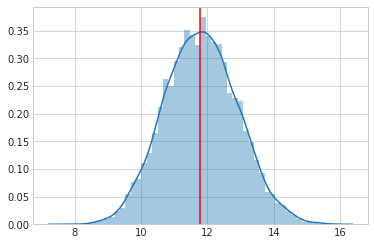

In [5]:
n=100
varname='Black'
sample_dist = [np.mean(mid[varname].sample(n)) for _ in range(10000)]
print("Theoretical SE:", np.std(mid[varname])/np.sqrt(n))
print("SD of sampling distribution:", np.std(sample_dist))
sns.distplot(sample_dist)
plt.axvline(np.mean(mid[varname]), ymax=1, color='r')

Now the the standard deviation of the sampling distribution is notably lower. To see why, let's go even more extreme and sample almost all of the distrcits, by setting `n=320`

Theoretical SE: 0.7355243492414911
SD of sampling distribution: 0.07059598372516684


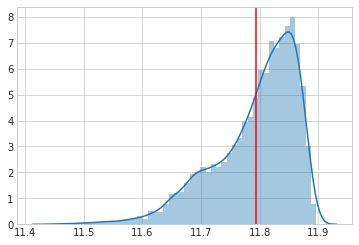

In [6]:
n=320
varname='Black'
sample_dist = [np.mean(mid[varname].sample(n)) for _ in range(10000)]
print("Theoretical SE:", np.std(mid[varname])/np.sqrt(n))
print("SD of sampling distribution:", np.std(sample_dist))
sns.distplot(sample_dist)
plt.axvline(np.mean(mid[varname]), ymax=1, color='r')

Now the standard deviation of our sampling distribution is much smaller than $\sigma/\sqrt{n}$. This is because if we include almost all of the congressional districts, there will be very little difference between the samples: almost all of them include nearly all of the districts, so the average won't vay too much. 

Formally, the Central Limit Theorem assumes that the population is very large relative to the samples, and if so this is not a problem. When the sample is large relative to the population, one way to fix this is with a <a href="https://www.statisticshowto.com/finite-population-correction-factor/">finite population correction factor.</a> As a challenge, see if you can write some code that implements this for the simulation above. 

Another way is what we did above, which is to sample with replacement, in which case our effective population is infinite because we can always just resample the same observations. 